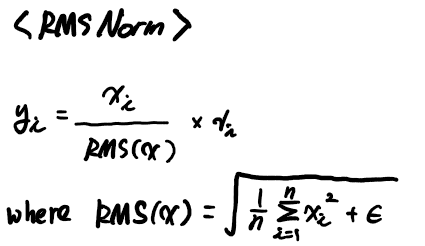

In [2]:
import torch
import torch.nn as nn

In [4]:
class RMSNorm(nn.Module):
    def __init__(self, dim: int, epsilon: float = 1e-8):
        super().__init__()
        self.dim = dim
        self.eps = epsilon
        self.weight = nn.Parameter(torch.ones(dim))
        
    def _reciprocal_rms(self, x: torch.Tensor):
        '''
        rms(x) = sqrt(mean(x^2))
        reciprocal_rms(x) = x / rms(x)
        '''
        
        # (B, seq_len, dim) * (B,. seq_len, 1) -> (B, seq_len, dim)
        return x * torch.rsqrt(x.pow(2).mean(dim=self.dim, keepdim=True) + self.eps)
    
    def forward(self, x:torch.Tensor):        
        # (dim) * (B, seq_len, dim) -> (B, seq_len, dim)
        return self.weight * self._reciprocal_rms(x).type_as(x)